In [72]:
import pandas as pd
import numpy as np
import pandasql as ps
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [73]:
df = pd.read_csv('global_food_wastage_dataset_with_coords.csv')

In [74]:
df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),latitude,longitude
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64,-25.274398,133.775136
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61,-0.789275,113.921327
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08,51.165691,10.451526
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91,46.227638,2.213749
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06,46.227638,2.213749


In [75]:
#Predict Food Category using rest of numeric features

In [76]:
le = LabelEncoder()
df['Category_Label'] = le.fit_transform(df['Food Category'])

In [77]:
features = ['Year', 'Total Waste (Tons)', 'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)',
           'Population (Million)', 'Household Waste (%)', 'latitude', 'longitude']

In [78]:
X = df[features]
y = df['Category_Label']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
y_pred = clf.predict(X_test)

In [82]:
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)


In [83]:
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Classification Report:
                     precision    recall  f1-score   support

       Bakery Items       0.12      0.11      0.11       134
          Beverages       0.11      0.15      0.13       119
     Dairy Products       0.11      0.10      0.11       131
        Frozen Food       0.11      0.11      0.11       123
Fruits & Vegetables       0.14      0.17      0.15       114
   Grains & Cereals       0.10      0.08      0.09       107
     Meat & Seafood       0.13      0.09      0.11       127
      Prepared Food       0.16      0.18      0.17       145

           accuracy                           0.12      1000
          macro avg       0.12      0.12      0.12      1000
       weighted avg       0.12      0.12      0.12      1000



In [84]:
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)

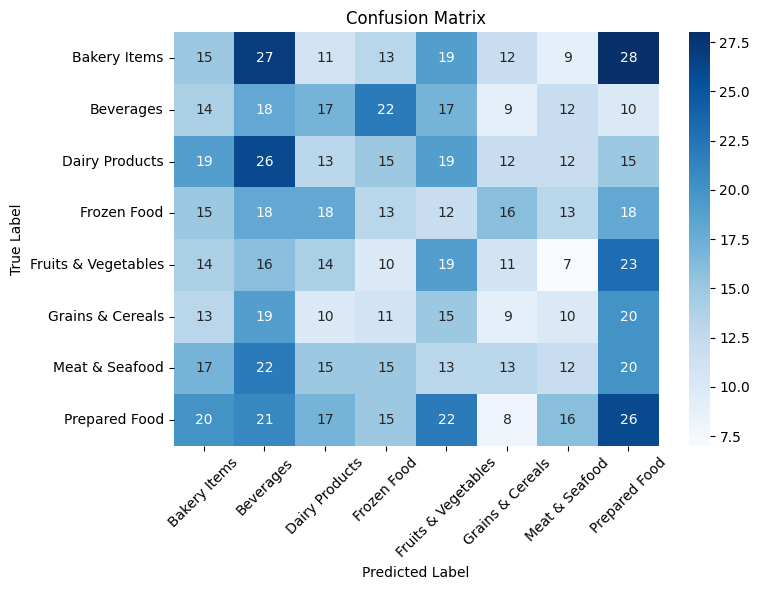

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, 
           yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [86]:
#Predict the year when food waste was recorded

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
features = ['Total Waste (Tons)', 'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)',
            'Population (Million)', 'Household Waste (%)', 'latitude', 'longitude']
X = df[features]
y = df['Year']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [128]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [129]:
y_pred = model.predict(X_test)

In [130]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [131]:
print(f"RMSE: {rmse:.2f}")

RMSE: 2.03


In [132]:
print(f"R2 Score: {r2:.2f}")

R2 Score: -0.07
